# Rainfall Weather Forecasting

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

# Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.




# Step 1: importing necessary libraries and load the data

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the dataset
rain=pd.read_csv(r'C:\Users\HP\Downloads\weatherAUS (1).csv')
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


As we can see there are 8425 rows and 23 columns. Here raintomorrow and rainfall columns are our target variable. Both columns are continuous variable, so it a regression model.

These are the column given in the dataset:

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Step2: Exploratory Data Analysis(EDA)

In [6]:
# checking the shape of the dataset
rain.shape

(8425, 23)

From the given data we have 8425 rows and 23 coulumns. out of 23 columns we have to two target variables for prediction.

In [7]:
#displaying the list of columns
rain.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
#checking the duplicate values
rain.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8420    False
8421    False
8422    False
8423    False
8424    False
Length: 8425, dtype: bool

luckily there is no dupliacte values presented.

In [9]:
# extracting month and date from date column in the given dataset

rain['Date']=pd.to_datetime(rain['Date'])
rain['Month']=rain['Date'].dt.month
rain['Day']=rain['Date'].dt.day

In [10]:
#checking null values

rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
Day                 0
dtype: int64

In [11]:
rain.shape

(8425, 25)

In [12]:
#Getting the normal summary and statistical information of the data
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [13]:
#checking unique values
rain.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
Month              12
Day                31
dtype: int64

In [14]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in rain.dtypes.index:
    if rain.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in rain.dtypes.index:
    if rain.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


numerical column:  ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month', 'Day']




In [15]:
#applying fillna method
for i in categorical_col:
    rain[i] = rain[i].fillna(rain[i].mode()[0])
    
for j in numerical_col:
    rain[j] = rain[j].fillna(rain[j].mean())

Using fillna method and removing those null values which was presnted in the given dataset.

In [16]:
#checking missing values
rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
dtype: int64

Yes, now there is no null values.

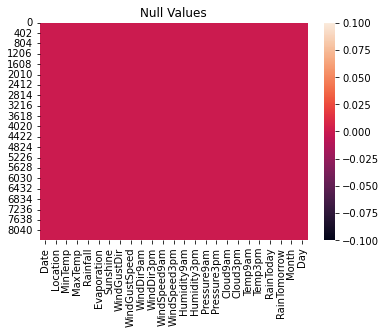

In [17]:
#Visualizing null values
plt.figure(figsize=[6,4])
sns.heatmap(rain.isnull())
plt.title("Null Values")
plt.show()


In [18]:
#Getting the normal summary and statistical information of the data
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   Evaporation    8425 non-null   float64       
 6   Sunshine       8425 non-null   float64       
 7   WindGustDir    8425 non-null   object        
 8   WindGustSpeed  8425 non-null   float64       
 9   WindDir9am     8425 non-null   object        
 10  WindDir3pm     8425 non-null   object        
 11  WindSpeed9am   8425 non-null   float64       
 12  WindSpeed3pm   8425 non-null   float64       
 13  Humidity9am    8425 non-null   float64       
 14  Humidity3pm    8425 non-null   float64       
 15  Pressure9am    8425 n

In [19]:
rain=rain.drop('Date', axis=1)

In [20]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,12,1
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,12,2
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,12,3
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,12,4
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,12,5


In [21]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,6.442136,15.741958
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,3.000000,8.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,6.000000,16.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,12.000000,31.000000


As per my observation, the value count is same in all the columns which indicates no missing data. 

The difference between the mean and standard devaition of each is not very less. 

The mean value is less than std value in Rainfall column. 

The mean value is more than 50% of median in all columns so, there will skewness problem. 

Also we can have min, 75%, max values.

# Step 3: Visualization

# Univariate analysis

In [22]:
numerical_col=[]
for i in rain.dtypes.index:
    if rain.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

numerical column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month', 'Day']




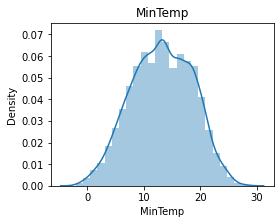

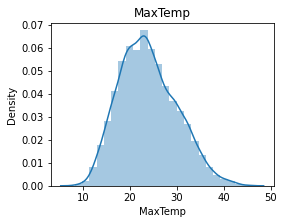

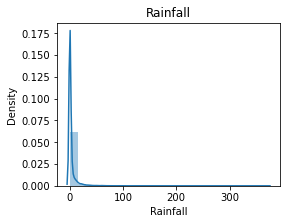

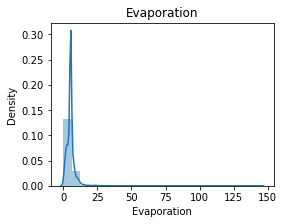

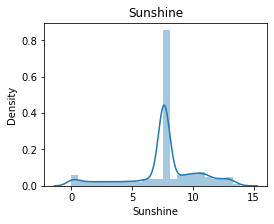

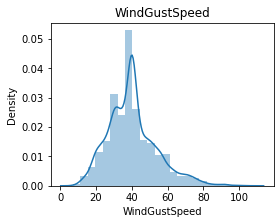

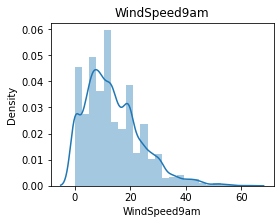

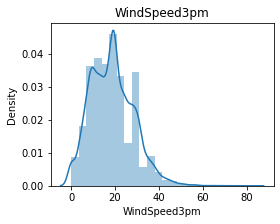

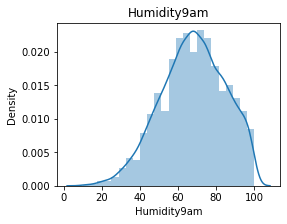

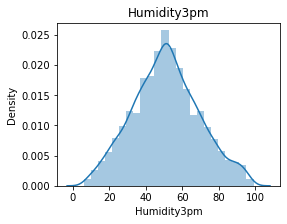

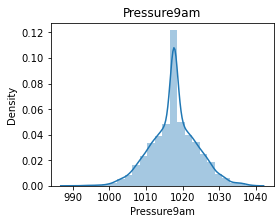

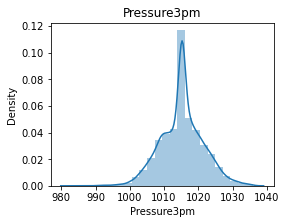

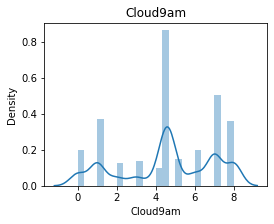

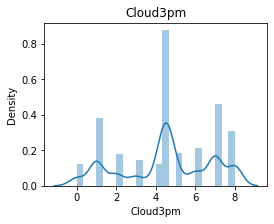

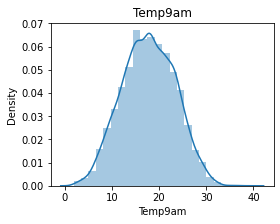

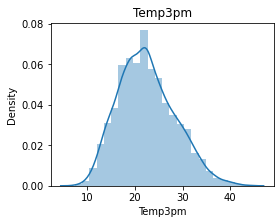

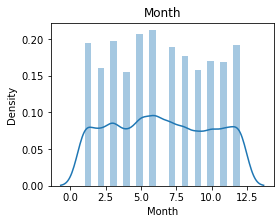

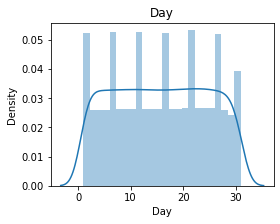

In [23]:
#distribution plot for numerical columns
for k in rain[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(rain[k], bins = 24)
    plt.title(k)
    plt.show()

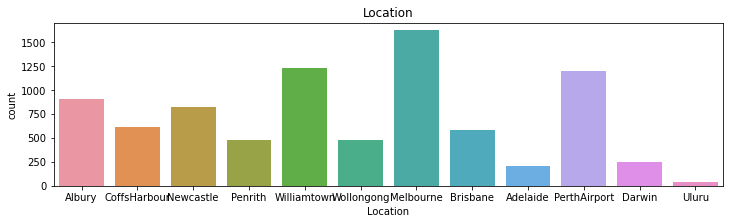

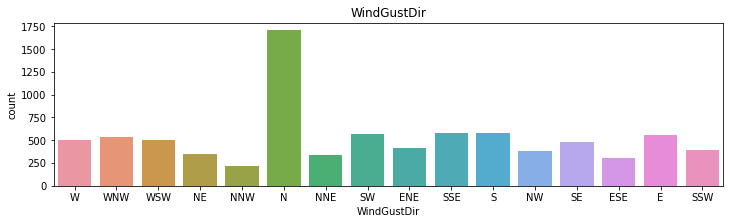

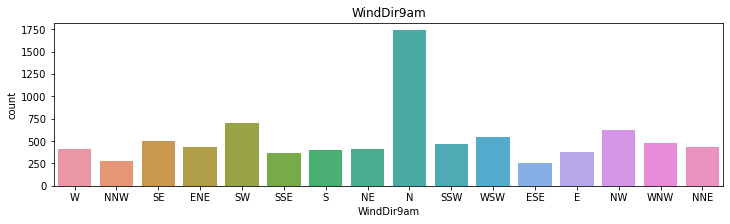

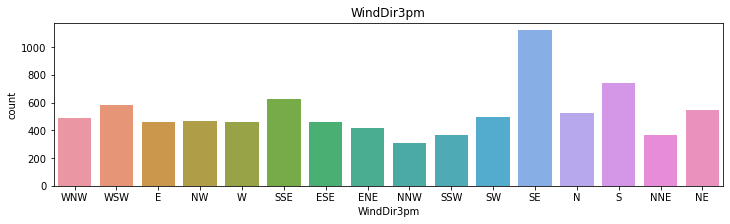

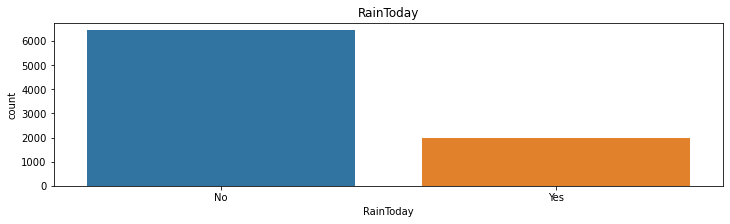

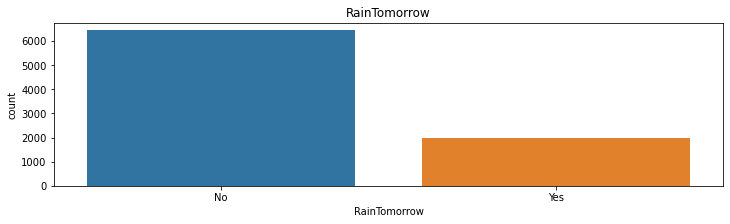

In [24]:
#distribution plot for numerical columns
for k in rain[categorical_col]:              
    plt.figure(figsize = (12, 3))
    sns.countplot(rain[k])
    plt.title(k)
    plt.show()

# Bivariate Analysis

In [25]:
y1 = rain['RainTomorrow']
y2 = rain['Rainfall']
x = rain.drop(["Rainfall","RainTomorrow"], axis=1)

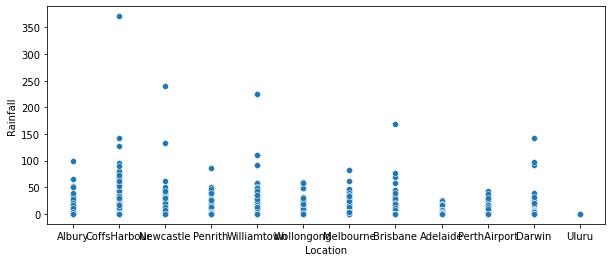

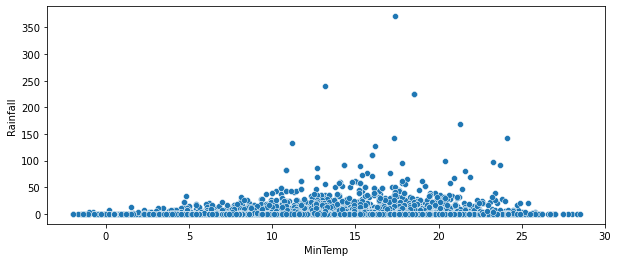

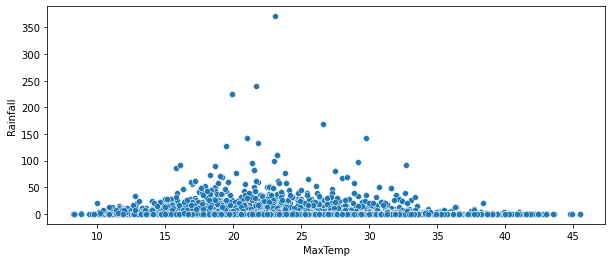

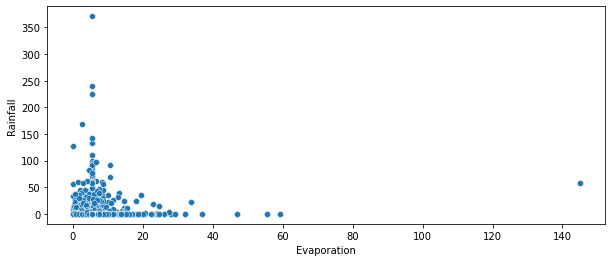

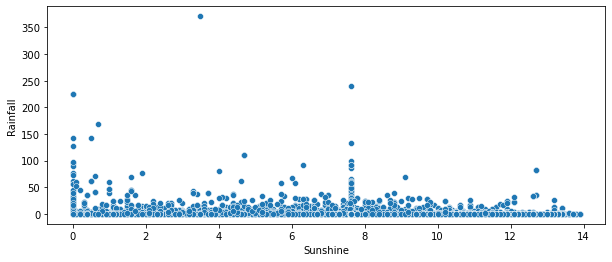

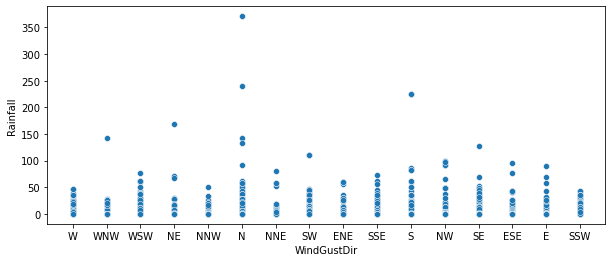

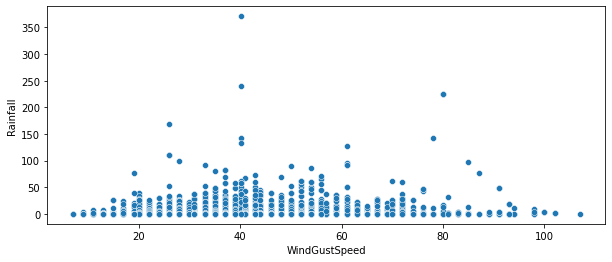

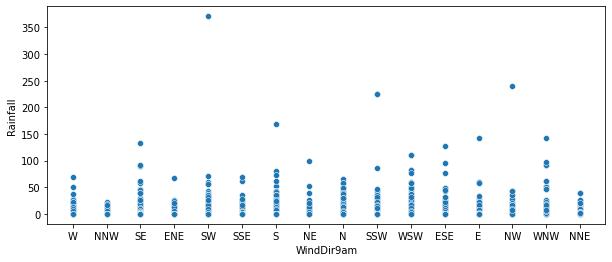

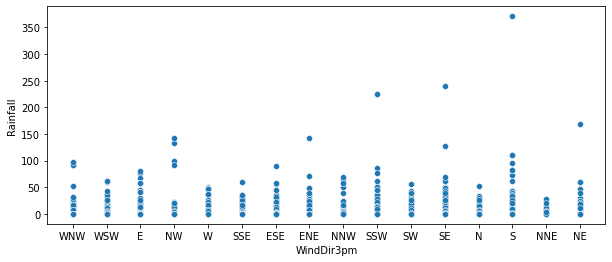

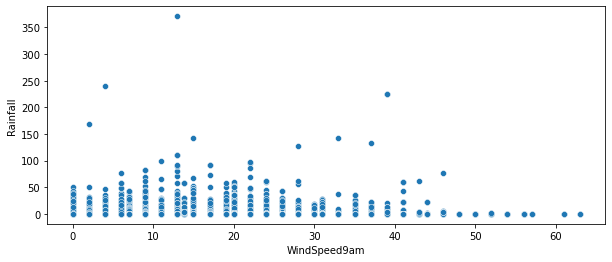

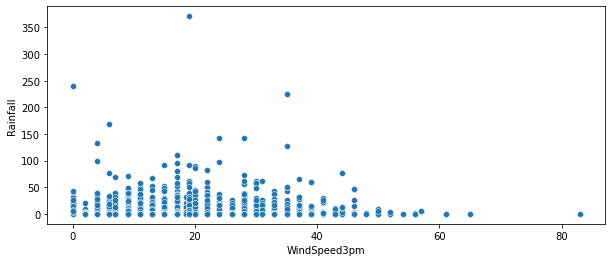

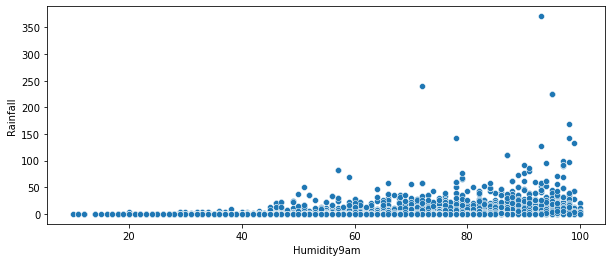

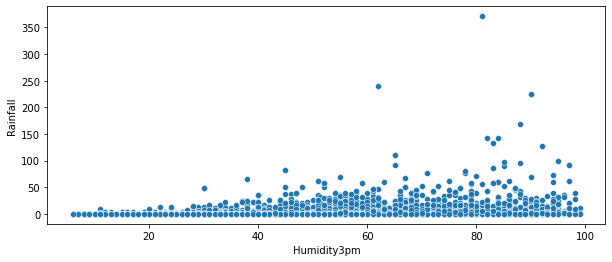

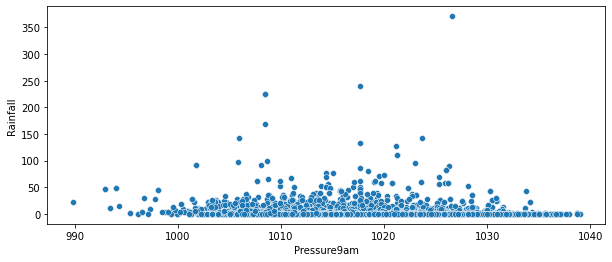

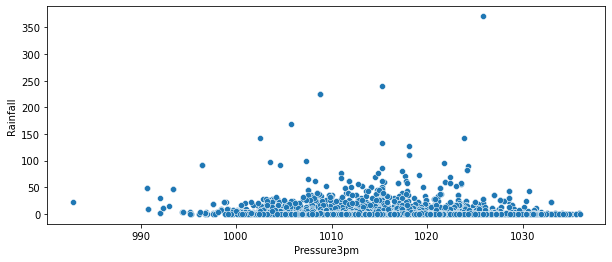

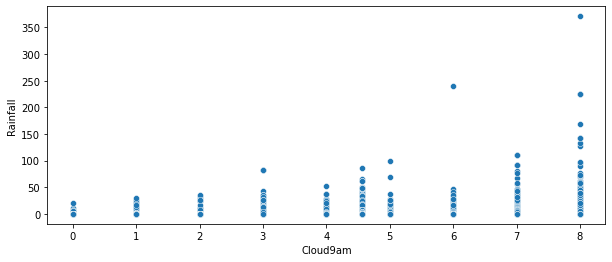

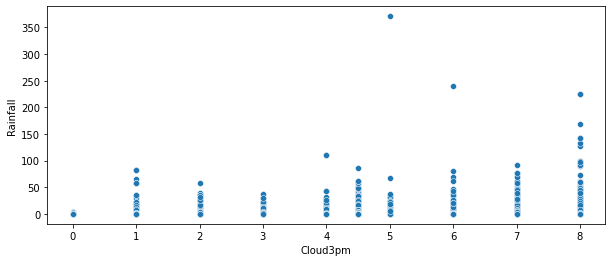

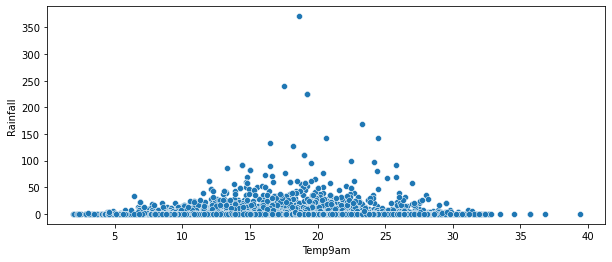

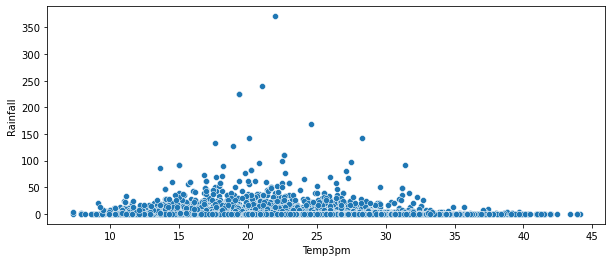

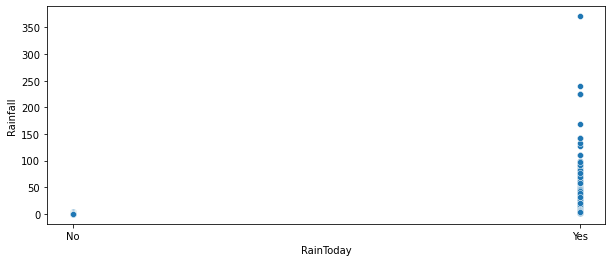

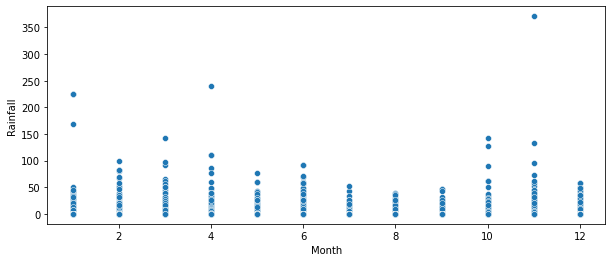

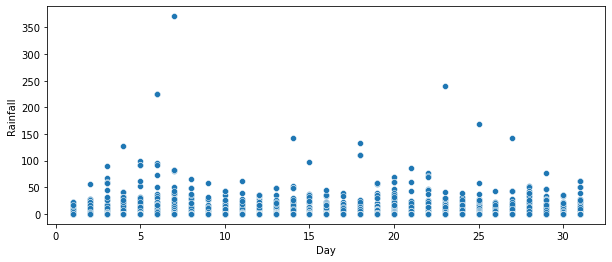

In [26]:
columns=x

for l in columns:
    plt.figure(figsize=(10,4))
    sns.scatterplot(rain[l], rain['Rainfall'])
    

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

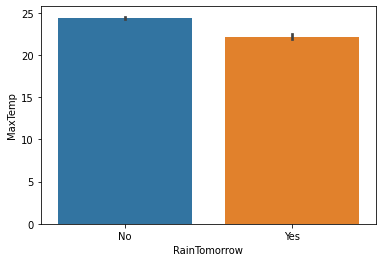

In [27]:
sns.barplot(y='MaxTemp', x='RainTomorrow', data = rain)

if the max temp increases then rain will decreases.

<AxesSubplot:xlabel='RainTomorrow', ylabel='MinTemp'>

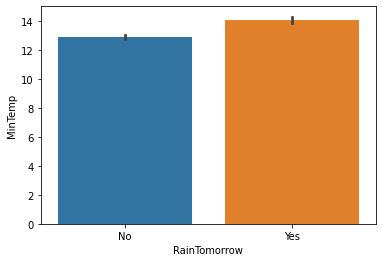

In [28]:
sns.barplot(y='MinTemp', x='RainTomorrow', data = rain)

if the min_temp is low then rain will occurs

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

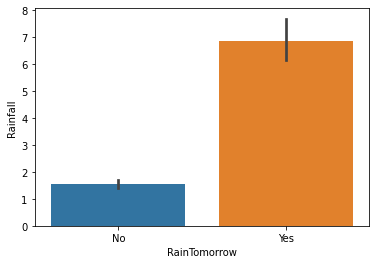

In [29]:
sns.barplot(y='Rainfall', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

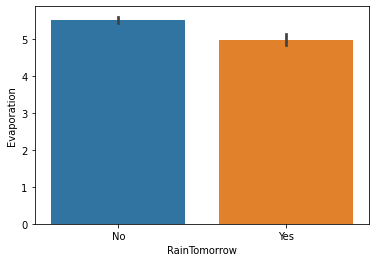

In [30]:
sns.barplot(y='Evaporation', x='RainTomorrow', data = rain)

In [31]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'Day']

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

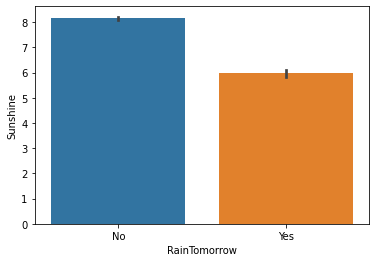

In [32]:
sns.barplot(y='Sunshine', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

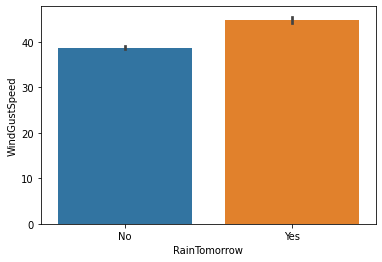

In [33]:
sns.barplot(y='WindGustSpeed', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed9am'>

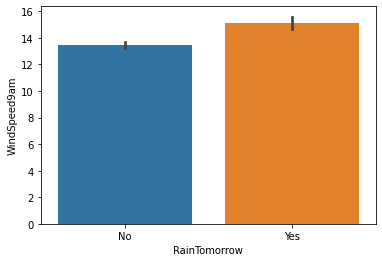

In [34]:
sns.barplot(y='WindSpeed9am', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

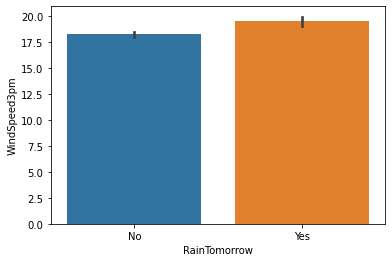

In [35]:
sns.barplot(y='WindSpeed3pm', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

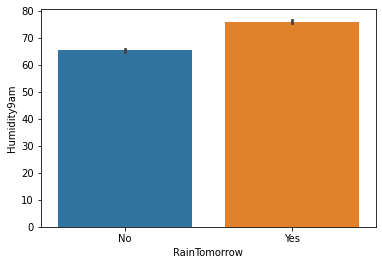

In [36]:
sns.barplot(y='Humidity9am', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

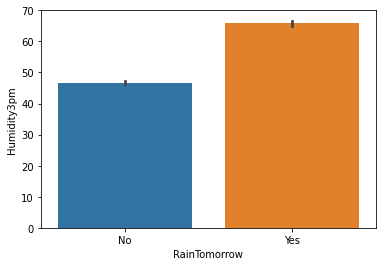

In [37]:
sns.barplot(y='Humidity3pm', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

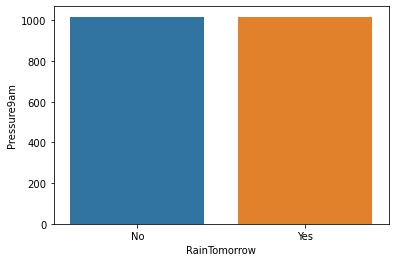

In [38]:
sns.barplot(y='Pressure9am', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure3pm'>

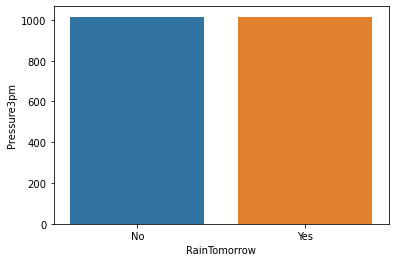

In [39]:
sns.barplot(y='Pressure3pm', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

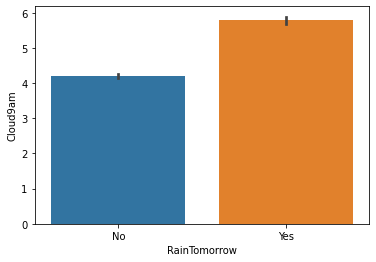

In [40]:
sns.barplot(y='Cloud9am', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

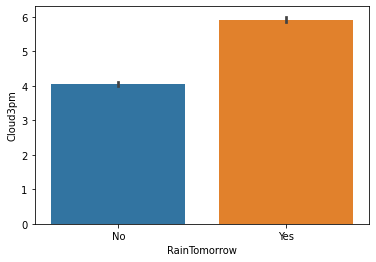

In [41]:
sns.barplot(y='Cloud3pm', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp9am'>

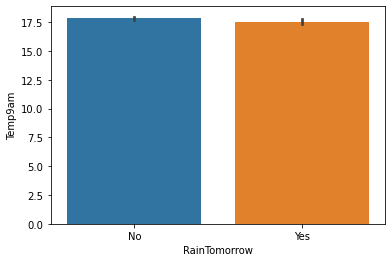

In [42]:
sns.barplot(y='Temp9am', x='RainTomorrow', data = rain)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

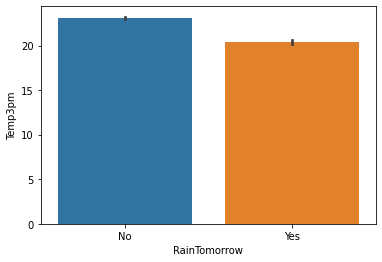

In [43]:
sns.barplot(y='Temp3pm', x='RainTomorrow', data = rain)

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in rain.columns:
    rain[column] = labelencoder.fit_transform(rain[column])

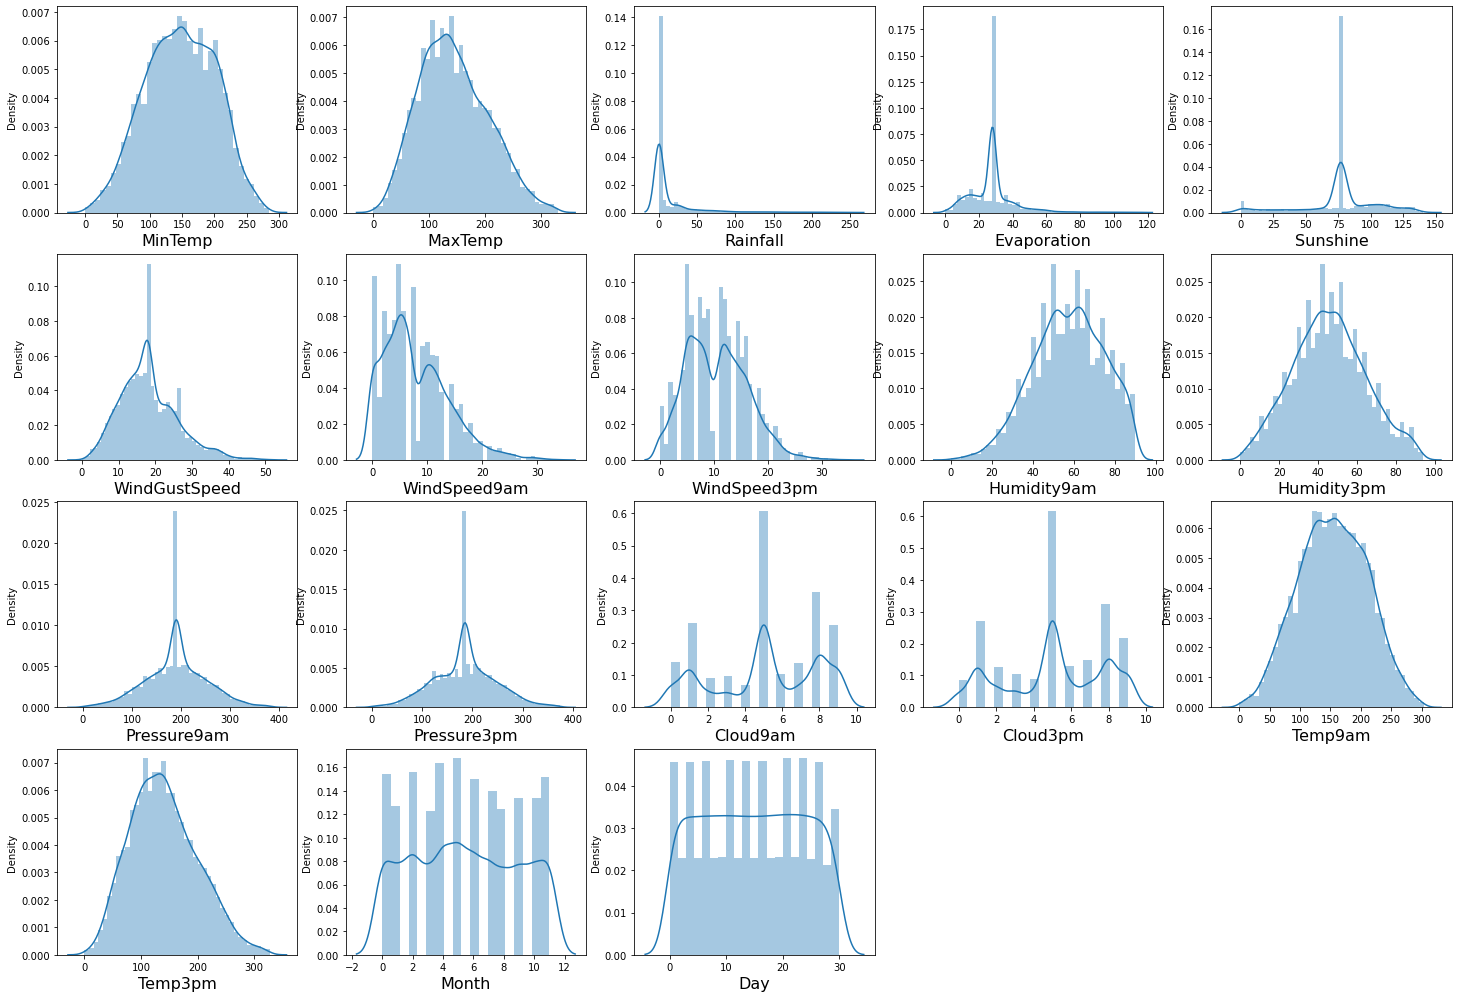

In [45]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=24:
    
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(rain[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

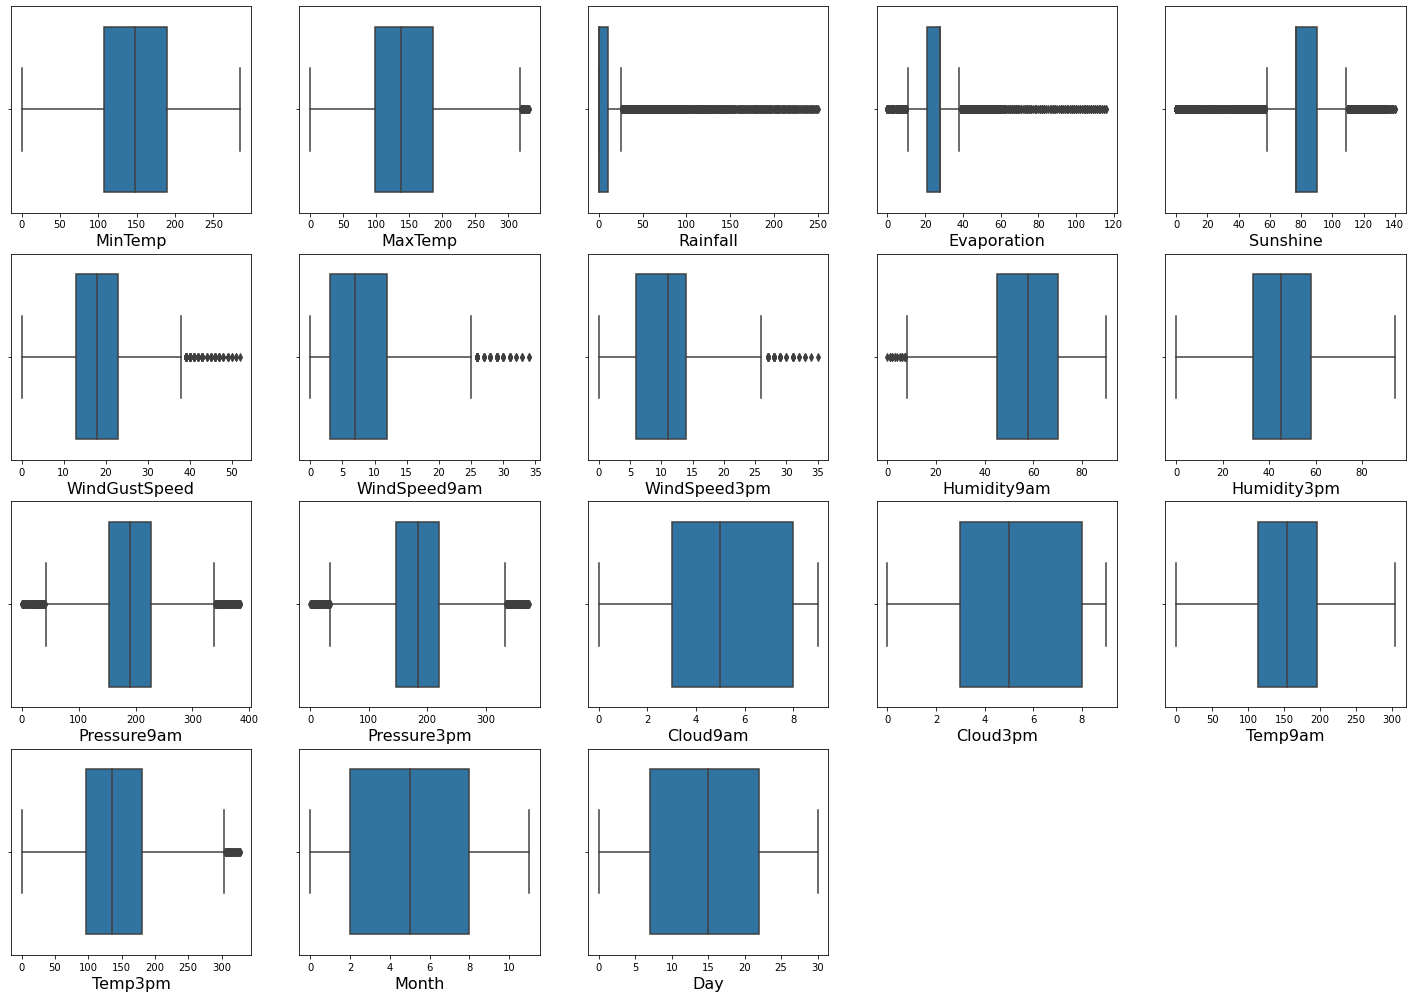

In [46]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=24:
    
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(rain[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

In [47]:
y1 = rain['RainTomorrow']
y2 = rain['Rainfall']
x = rain.drop(["Rainfall","RainTomorrow"], axis=1)

In [48]:
# removing outliers using statsmodel
from scipy import stats
from scipy.stats import zscore

z=np.abs(zscore(x))

threshold=3
np.where(z>3)
data=rain[(z<3).all(axis=1)]

In [49]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,1,150,134,5,28,77,13,21,13,14,...,90,103,9,5,145,134,0,0,11,0
1,1,89,157,0,28,77,14,21,6,15,...,119,110,5,5,148,160,0,0,11,1
2,1,144,163,0,28,77,15,22,13,15,...,89,119,5,2,187,149,0,0,11,2
3,1,107,186,0,28,77,4,9,9,0,...,189,160,5,5,158,182,0,0,11,3
4,1,191,229,8,28,77,13,19,1,7,...,121,92,8,9,155,214,0,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,43,139,0,28,77,0,13,9,1,...,260,236,5,5,77,140,0,0,5,20
8421,9,51,159,0,28,77,6,8,9,3,...,249,224,5,5,85,162,0,0,5,21
8422,9,69,175,0,28,77,3,16,9,14,...,224,201,5,5,101,178,0,0,5,22
8423,9,93,176,0,28,77,9,11,10,3,...,208,198,3,2,127,177,0,0,5,23


In [50]:
z

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Day
0,1.515776,0.047516,0.163138,0.017303,0.001932,1.229643,0.367959,1.249535,1.397222,0.699562,...,1.589383,1.598676,1.325499,1.384669,0.013694,0.161357,0.114818,0.556099,1.616696,1.677733
1,1.515776,1.079105,0.211959,0.017303,0.001932,1.442303,0.367959,0.276260,1.622961,1.001884,...,1.429054,1.135079,1.212343,0.033497,0.013694,0.108129,0.320862,0.556099,1.616696,1.563926
2,1.515776,0.063299,0.309810,0.017303,0.001932,1.654964,0.496113,1.249535,1.622961,0.529417,...,1.161838,1.614662,1.066857,0.033497,1.130196,0.583839,0.136536,0.556099,1.616696,1.450120
3,1.515776,0.746660,0.684906,0.017303,0.001932,0.684299,1.169893,0.377652,1.763120,0.321306,...,1.910042,0.016053,0.404086,0.033497,0.013694,0.069299,0.689514,0.556099,1.616696,1.336313
4,1.515776,0.804753,1.386173,0.017303,0.001932,1.229643,0.111650,1.366114,0.182949,0.661595,...,1.001509,1.103107,1.503315,1.030127,1.474975,0.016071,1.225735,0.556099,1.616696,1.222506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,1.928688,0.081595,0.017303,0.001932,1.534940,0.657276,0.377652,1.537381,0.151161,...,1.482497,1.118961,0.824464,0.033497,0.013694,1.367864,0.014277,0.556099,0.128611,0.598400
8421,1.013895,1.780934,0.244576,0.017303,0.001932,0.258979,1.298048,0.377652,1.085904,0.151161,...,1.642827,0.943113,0.630483,0.033497,0.013694,1.225922,0.354376,0.556099,0.128611,0.712207
8422,1.013895,1.448489,0.505512,0.017303,0.001932,0.896959,0.272813,0.377652,1.397222,0.491450,...,1.482497,0.543461,0.258684,0.033497,0.013694,0.942038,0.622486,0.556099,0.128611,0.826013
8423,1.013895,1.005228,0.521821,0.017303,0.001932,0.379002,0.913585,0.595623,1.085904,0.151161,...,1.482497,0.287683,0.210189,0.742581,1.130196,0.480726,0.605729,0.556099,0.128611,0.939820


In [51]:
dataloss=(8425-8104)/8425*100
dataloss

3.8100890207715135

In [52]:
from scipy import stats 
IQR = stats.iqr(rain) 
IQR

72.0

In [53]:
Q1 = rain.quantile(0.25)
Q3 = rain.quantile(0.75)
rain_out = rain[~((rain < (Q1 - 1.5 * IQR)) |(rain> (Q3 + 1.5 * IQR))).any(axis=1)]
print(rain_out.shape)

(7773, 24)


In zscore method the dataloss is less compared with IQR method so i am considering Zscore method.

In [54]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,1,150,134,5,28,77,13,21,13,14,...,90,103,9,5,145,134,0,0,11,0
1,1,89,157,0,28,77,14,21,6,15,...,119,110,5,5,148,160,0,0,11,1
2,1,144,163,0,28,77,15,22,13,15,...,89,119,5,2,187,149,0,0,11,2
3,1,107,186,0,28,77,4,9,9,0,...,189,160,5,5,158,182,0,0,11,3
4,1,191,229,8,28,77,13,19,1,7,...,121,92,8,9,155,214,0,0,11,4


In [55]:
#corelation b/n features and target variable.
corr=data.corr()
corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
Location,1.000000,0.115424,0.060525,0.012421,0.135163,0.052446,-0.035585,0.246314,-0.035352,-0.024600,...,-0.025541,-0.013168,0.042448,0.023603,0.115169,0.056365,-0.000712,0.007171,-0.087593,-0.007291
MinTemp,0.115424,1.000000,0.717844,0.112346,0.377252,0.053629,-0.147472,0.225606,-0.038634,-0.152596,...,-0.432150,-0.426739,0.100001,0.041189,0.888582,0.686275,0.072975,0.093759,-0.251693,0.007069
MaxTemp,0.060525,0.717844,1.000000,-0.137430,0.481921,0.378653,-0.227732,0.124692,-0.210933,-0.186770,...,-0.331924,-0.411091,-0.244976,-0.245554,0.864865,0.974582,-0.220619,-0.154624,-0.169784,0.013384
Rainfall,0.012421,0.112346,-0.137430,1.000000,-0.079090,-0.211202,0.078795,0.106588,0.130484,0.067730,...,-0.103953,-0.041639,0.250488,0.211736,-0.024754,-0.145815,0.685987,0.300264,-0.010185,-0.014016
Evaporation,0.135163,0.377252,0.481921,-0.079090,1.000000,0.382019,-0.118810,0.183115,-0.115808,-0.029642,...,-0.265355,-0.282113,-0.117361,-0.155929,0.448576,0.468156,-0.164501,-0.093505,-0.061378,0.002918
Sunshine,0.052446,0.053629,0.378653,-0.211202,0.382019,1.000000,-0.102991,-0.005934,-0.075520,-0.067218,...,0.004671,-0.054439,-0.528205,-0.541820,0.251504,0.394739,-0.235254,-0.323017,0.000629,0.001013
WindGustDir,-0.035585,-0.147472,-0.227732,0.078795,-0.118810,-0.102991,1.000000,0.019338,0.401014,0.507759,...,-0.106036,-0.021032,0.117942,0.087674,-0.177827,-0.240823,0.119959,0.044203,0.035112,0.015800
WindGustSpeed,0.246314,0.225606,0.124692,0.106588,0.183115,-0.005934,0.019338,1.000000,-0.062931,0.080551,...,-0.378670,-0.337283,0.024904,0.072953,0.188713,0.088814,0.085810,0.191374,0.044554,-0.007453
WindDir9am,-0.035352,-0.038634,-0.210933,0.130484,-0.115808,-0.075520,0.401014,-0.062931,1.000000,0.244887,...,-0.008818,0.074612,0.093050,0.060729,-0.095725,-0.218457,0.153710,0.032264,0.015273,-0.011798
WindDir3pm,-0.024600,-0.152596,-0.186770,0.067730,-0.029642,-0.067218,0.507759,0.080551,0.244887,1.000000,...,-0.128869,-0.038495,0.073623,0.051872,-0.170074,-0.198778,0.098593,0.006023,0.030178,-0.001222


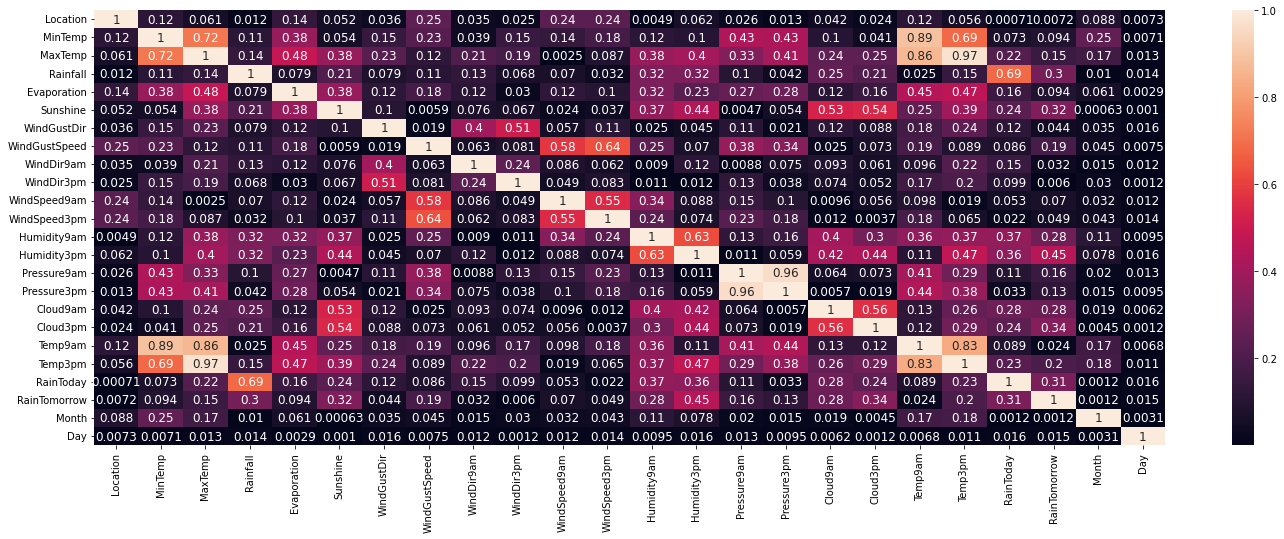

In [32]:
df_corr=data.corr().abs()
plt.figure(figsize=(24,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

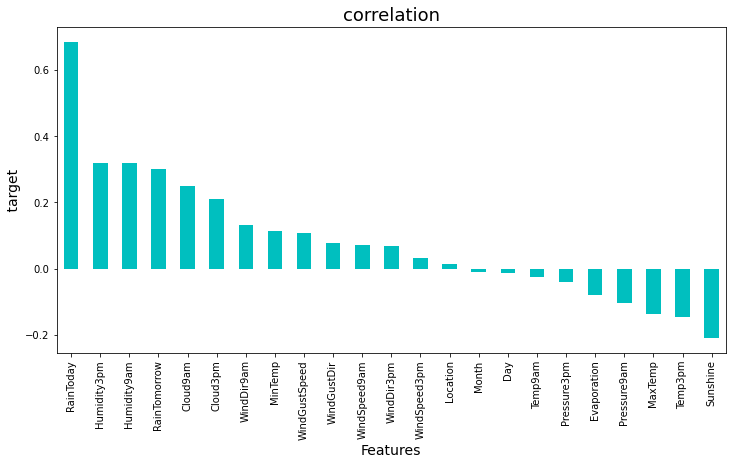

In [56]:
plt.figure(figsize=(12,6))
data.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

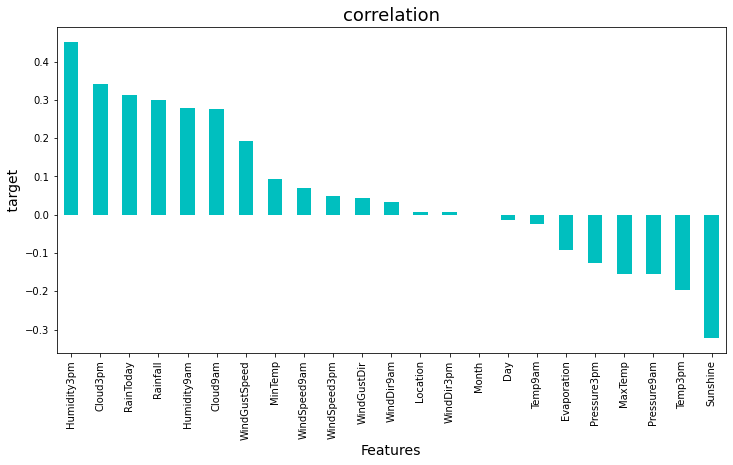

In [57]:
plt.figure(figsize=(12,6))
data.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [58]:
data.skew()

Location        -0.033924
MinTemp         -0.086453
MaxTemp          0.333784
Rainfall         3.490031
Evaporation      0.504992
Sunshine        -0.730869
WindGustDir      0.108464
WindGustSpeed    0.491107
WindDir9am       0.157050
WindDir3pm      -0.131062
WindSpeed9am     0.659274
WindSpeed3pm     0.290245
Humidity9am     -0.228993
Humidity3pm      0.118433
Pressure9am      0.029807
Pressure3pm      0.052331
Cloud9am        -0.315146
Cloud3pm        -0.248047
Temp9am         -0.030439
Temp3pm          0.349930
RainToday        1.231283
RainTomorrow     1.248972
Month            0.058254
Day              0.007258
dtype: float64

In [59]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in data.columns:
    if abs(data.loc[:,i].skew())>0.5:
        data.loc[:,i]=PT.fit_transform(data.loc[:,i].values.reshape(-1,1))

In [60]:
data.skew()

Location        -0.033924
MinTemp         -0.086453
MaxTemp          0.333784
Rainfall         0.674185
Evaporation      0.062403
Sunshine        -0.274036
WindGustDir      0.108464
WindGustSpeed    0.491107
WindDir9am       0.157050
WindDir3pm      -0.131062
WindSpeed9am    -0.099365
WindSpeed3pm     0.290245
Humidity9am     -0.228993
Humidity3pm      0.118433
Pressure9am      0.029807
Pressure3pm      0.052331
Cloud9am        -0.315146
Cloud3pm        -0.248047
Temp9am         -0.030439
Temp3pm          0.349930
RainToday        1.231283
RainTomorrow     1.248972
Month            0.058254
Day              0.007258
dtype: float64

In [61]:
b1 = rain['RainTomorrow']
b2 = rain['Rainfall']
a = rain.drop(["Rainfall","RainTomorrow"], axis=1)

In [62]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Day
0,-1.515776,0.047516,-0.163138,0.017303,0.001932,1.229643,0.367959,1.249535,1.397222,0.699562,...,-1.589383,-1.598676,-1.325499,1.384669,-0.013694,-0.161357,-0.114818,-0.556099,1.616696,-1.677733
1,-1.515776,-1.079105,0.211959,0.017303,0.001932,1.442303,0.367959,-0.276260,1.622961,-1.001884,...,-1.429054,-1.135079,-1.212343,-0.033497,-0.013694,-0.108129,0.320862,-0.556099,1.616696,-1.563926
2,-1.515776,-0.063299,0.309810,0.017303,0.001932,1.654964,0.496113,1.249535,1.622961,0.529417,...,-1.161838,-1.614662,-1.066857,-0.033497,-1.130196,0.583839,0.136536,-0.556099,1.616696,-1.450120
3,-1.515776,-0.746660,0.684906,0.017303,0.001932,-0.684299,-1.169893,0.377652,-1.763120,-0.321306,...,-1.910042,-0.016053,-0.404086,-0.033497,-0.013694,0.069299,0.689514,-0.556099,1.616696,-1.336313
4,-1.515776,0.804753,1.386173,0.017303,0.001932,1.229643,0.111650,-1.366114,-0.182949,-0.661595,...,-1.001509,-1.103107,-1.503315,1.030127,1.474975,0.016071,1.225735,-0.556099,1.616696,-1.222506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,-1.928688,-0.081595,0.017303,0.001932,-1.534940,-0.657276,0.377652,-1.537381,-0.151161,...,-1.482497,1.118961,0.824464,-0.033497,-0.013694,-1.367864,-0.014277,-0.556099,-0.128611,0.598400
8421,1.013895,-1.780934,0.244576,0.017303,0.001932,-0.258979,-1.298048,0.377652,-1.085904,-0.151161,...,-1.642827,0.943113,0.630483,-0.033497,-0.013694,-1.225922,0.354376,-0.556099,-0.128611,0.712207
8422,1.013895,-1.448489,0.505512,0.017303,0.001932,-0.896959,-0.272813,0.377652,1.397222,-0.491450,...,-1.482497,0.543461,0.258684,-0.033497,-0.013694,-0.942038,0.622486,-0.556099,-0.128611,0.826013
8423,1.013895,-1.005228,0.521821,0.017303,0.001932,0.379002,-0.913585,0.595623,-1.085904,-0.151161,...,-1.482497,0.287683,0.210189,-0.742581,-1.130196,-0.480726,0.605729,-0.556099,-0.128611,0.939820


In [63]:
x_scaled

array([[-1.51577598e+00,  4.75156934e-02, -1.63137627e-01, ...,
        -5.56099190e-01,  1.61669646e+00, -1.67773291e+00],
       [-1.51577598e+00, -1.07910496e+00,  2.11958706e-01, ...,
        -5.56099190e-01,  1.61669646e+00, -1.56392626e+00],
       [-1.51577598e+00, -6.32994531e-02,  3.09809924e-01, ...,
        -5.56099190e-01,  1.61669646e+00, -1.45011961e+00],
       ...,
       [ 1.01389522e+00, -1.44848878e+00,  5.05512358e-01, ...,
        -5.56099190e-01, -1.28610663e-01,  8.26013396e-01],
       [ 1.01389522e+00, -1.00522820e+00,  5.21820895e-01, ...,
        -5.56099190e-01, -1.28610663e-01,  9.39820046e-01],
       [ 1.01389522e+00,  3.24553560e-01, -5.22647452e-05, ...,
        -5.56099190e-01, -1.28610663e-01,  1.05362670e+00]])

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.164565,Location
1,8.371231,MinTemp
2,26.390727,MaxTemp
3,1.405861,Evaporation
4,1.886566,Sunshine
5,1.582678,WindGustDir
6,2.435400,WindGustSpeed
7,1.336414,WindDir9am
8,1.476475,WindDir3pm
9,2.057475,WindSpeed9am


In [65]:
a=a.drop("Temp3pm", axis=1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.163844,Location
1,8.333008,MinTemp
2,9.793023,MaxTemp
3,1.404402,Evaporation
4,1.886336,Sunshine
5,1.579089,WindGustDir
6,2.420078,WindGustSpeed
7,1.335650,WindDir9am
8,1.475246,WindDir3pm
9,2.056712,WindSpeed9am


In [67]:
a=a.drop('Pressure9am',axis=1)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.163642,Location
1,8.186539,MinTemp
2,9.381405,MaxTemp
3,1.394204,Evaporation
4,1.884083,Sunshine
5,1.564035,WindGustDir
6,2.400182,WindGustSpeed
7,1.316501,WindDir9am
8,1.396202,WindDir3pm
9,2.055532,WindSpeed9am


In [69]:
a=a.drop("Temp9am",axis=1)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.149153,Location
1,4.403313,MinTemp
2,5.413702,MaxTemp
3,1.393705,Evaporation
4,1.880588,Sunshine
5,1.563438,WindGustDir
6,2.358956,WindGustSpeed
7,1.316448,WindDir9am
8,1.395889,WindDir3pm
9,2.033883,WindSpeed9am


In [71]:
a=a.drop('MaxTemp',axis=1)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.147009,Location
1,1.648391,MinTemp
2,1.379492,Evaporation
3,1.834540,Sunshine
4,1.561353,WindGustDir
5,2.357045,WindGustSpeed
6,1.281334,WindDir9am
7,1.391907,WindDir3pm
8,1.956740,WindSpeed9am
9,1.926390,WindSpeed3pm


In [73]:
b1.value_counts()


0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [74]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b1=sampling.fit_resample(a,b1)

In [75]:
b1.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

# step4: Modelling

# whether or not it will rain tomorrow.

# DecisionTreeRegressor


In [76]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,Month,Day
0,-1.544744,-0.009313,0.074663,0.198167,1.229389,0.247297,1.255465,1.437529,0.669510,0.583697,0.047990,-1.790388,-1.259297,1.247296,-0.240556,-0.677665,1.641798,-1.709173
1,-1.544744,-1.176998,0.074663,0.198167,1.447910,0.247297,-0.303018,1.670794,-1.043396,0.408690,-1.613541,-1.635712,-1.145063,-0.217466,-0.240556,-0.677665,1.641798,-1.592824
2,-1.544744,-0.124167,0.074663,0.198167,1.666431,0.372345,1.255465,1.670794,0.498220,0.758704,-1.969583,-1.377919,-0.998191,-0.217466,-1.390664,-0.677665,1.641798,-1.476476
3,-1.544744,-0.832435,0.074663,0.198167,-0.737298,-1.253284,0.364903,-1.828171,-0.358233,-0.991363,-1.554201,-2.099740,-0.329106,-0.217466,-0.240556,-0.677665,1.641798,-1.360127
4,-1.544744,0.775524,0.074663,0.198167,1.229389,-0.002800,-1.416220,-0.195321,-0.700815,0.233684,0.700734,-1.223244,-1.438807,0.881105,1.292922,-0.677665,1.641798,-1.243778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,0.707818,-0.471261,-1.243406,-1.291684,0.166851,-0.485788,-0.525658,1.490601,-0.303858,0.058677,0.903248,0.487464,-0.057727,0.315354,0.996775,-0.677665,0.021152,0.422037
12864,0.064229,-0.066740,0.074663,0.198167,-0.955819,-0.127848,-0.825700,-0.033131,0.319571,0.568661,0.313865,-0.445435,0.078872,0.738068,-1.240916,-0.677665,-0.050230,-0.515234
12865,1.351407,0.871236,0.074663,0.198167,1.447910,0.622442,1.478105,-0.195321,0.498220,0.933710,1.590839,1.251569,-0.900276,1.247296,1.292922,1.481730,1.047615,0.734148
12866,1.367197,1.034124,0.074663,0.198167,-1.174340,1.235412,-1.193580,0.271208,1.714064,1.223613,0.762986,1.212660,0.868292,1.247296,1.292922,1.481730,-1.017450,0.171701


In [77]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [55]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9459554927587425 at random state is 88


In [56]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=112)

In [57]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt of  \n', classification_report(y_test,pred, digits=2))
        

In [58]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 87.919463%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1389
           1       0.88      0.89      0.88      1442

    accuracy                           0.88      2831
   macro avg       0.88      0.88      0.88      2831
weighted avg       0.88      0.88      0.88      2831



array([[1212,  177],
       [ 165, 1277]], dtype=int64)

In [59]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)



================ Test Result ================== 
Accuracy Score: 86.718474%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      1389
           1       0.81      0.96      0.88      1442

    accuracy                           0.87      2831
   macro avg       0.88      0.87      0.87      2831
weighted avg       0.88      0.87      0.87      2831



array([[1073,  316],
       [  60, 1382]], dtype=int64)

In [60]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 93.641823%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1389
           1       0.94      0.94      0.94      1442

    accuracy                           0.94      2831
   macro avg       0.94      0.94      0.94      2831
weighted avg       0.94      0.94      0.94      2831



array([[1302,   87],
       [  93, 1349]], dtype=int64)

In [61]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 85.164253%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1389
           1       0.86      0.84      0.85      1442

    accuracy                           0.85      2831
   macro avg       0.85      0.85      0.85      2831
weighted avg       0.85      0.85      0.85      2831



array([[1197,  192],
       [ 228, 1214]], dtype=int64)

In [62]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.557753%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1389
           1       0.93      0.90      0.92      1442

    accuracy                           0.92      2831
   macro avg       0.92      0.92      0.92      2831
weighted avg       0.92      0.92      0.92      2831



array([[1296,   93],
       [ 146, 1296]], dtype=int64)

In [63]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 94.630872%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1389
           1       0.94      0.95      0.95      1442

    accuracy                           0.95      2831
   macro avg       0.95      0.95      0.95      2831
weighted avg       0.95      0.95      0.95      2831



array([[1302,   87],
       [  65, 1377]], dtype=int64)

In [64]:
score=cross_val_score(dc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.68648019 0.72416472 0.86790987 0.82743879 0.69257676]
0.7597140649219934
Difference between Accuracy score and cross validation score is-  -0.2545921998566455


In [65]:
score=cross_val_score(kn, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.72766123 0.68492618 0.81235431 0.79828993 0.79673533]
0.7639933974562811
Difference between Accuracy score and cross validation score is-  -0.2588715323909332


In [66]:
score=cross_val_score(Etc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.78399378 0.76845377 0.8958819  0.91216479 0.85192382]
0.8424836121688045
Difference between Accuracy score and cross validation score is-  -0.33736174710345657


In [67]:
score=cross_val_score(bag, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.72649573 0.73115773 0.87801088 0.84998057 0.8321026 ]
0.8035495014119188
Difference between Accuracy score and cross validation score is-  -0.2984276363465709


In [68]:
score=cross_val_score(rfc, a,b1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.76068376 0.73310023 0.88034188 0.8872911  0.85581034]
0.8234454624271959
Difference between Accuracy score and cross validation score is-  -0.3183235973618479


After doing crossvalidation , decisiontreeclassifier model has less score comparing with other, so i am considering it and tuning the parameters.

# Step6: Hyperparameter Tuning

In [69]:
#import the Grid search CV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [70]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [71]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 39, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [153]:
final_model=DecisionTreeClassifier( max_depth= 1146, max_leaf_nodes=1149, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 88.237372%

 
 Test Classification Reprt of  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1389
           1       0.88      0.89      0.88      1442

    accuracy                           0.88      2831
   macro avg       0.88      0.88      0.88      2831
weighted avg       0.88      0.88      0.88      2831



After tuning the parameters my accuracy score is increased to 88.23%, which is good.

#  ROC-Curve

In [155]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

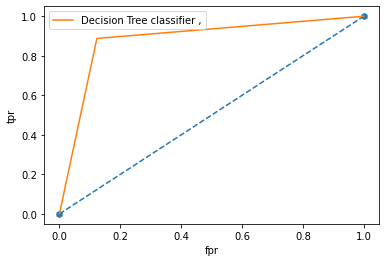

Auc Score is : 
 88.22729410495982


In [156]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="Decision Tree classifier ," %roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

# Step6: Save the model

In [157]:
#saving my model
import pickle

filename='Rainfalltomorrow  prediction'
pickle.dump(dc, open(filename,'wb'))


In [158]:
import pickle
loaded_model=pickle.load(open('Rainfalltomorrow  prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.91946308724832


In [159]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830
original,0,1,0,1,1,1,1,1,0,0,...,1,1,1,1,1,0,1,1,0,0
predicted,0,1,0,1,1,1,1,1,0,0,...,1,1,0,1,1,1,1,0,0,1


# Rainfall Prediction

# Step7:Modelling

# ExtraTreesRegreesor Model

In [162]:

b2 = rain['Rainfall']
a = rain.drop(["Rainfall","RainTomorrow"], axis=1)

In [165]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [181]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(a,b2, test_size=0.22, random_state=k)
    Dr=DecisionTreeRegressor()
    Dr.fit(x_train,y_train)
    pred=Dr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.5792821887703812 at random state is 2871


In [185]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b2, test_size=0.22, random_state=641)

In [186]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 70.3195820278977
R2_score on training data: 95.0251313515292
Mean Absolute Error: 7.621742179072276
Mean Squared Error: 387.35276909385107
Root Mean Squared Error: 19.68127966098371


In [187]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 57.47527066061675
R2_score on training data: 100.0
Mean Absolute Error: 7.0070118662351675
Mean Squared Error: 554.9811218985976
Root Mean Squared Error: 23.558037309983987


In [188]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: -6.892495701315382
R2_score on training data: -7.638218514048312
Mean Absolute Error: 14.345264294400762
Mean Squared Error: 1395.0310350809496
Root Mean Squared Error: 37.35011425793701


In [189]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 71.6147560192428
R2_score on training data: 100.0
Mean Absolute Error: 6.463985976267529
Mean Squared Error: 370.44973112189865
Root Mean Squared Error: 19.247070715355587


In [190]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 25.59746210620467
R2_score on training data: 48.448772987361586
Mean Absolute Error: 15.381661272923408
Mean Squared Error: 971.0115641855448
Root Mean Squared Error: 31.161058457400717


In [191]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 59.48934286202419
R2_score on training data: 65.65565456103594
Mean Absolute Error: 9.750486320099485
Mean Squared Error: 528.695897576507
Root Mean Squared Error: 22.993388127383643


In [192]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 70.34303242995999
R2_score on training data: 98.35273729473046
Mean Absolute Error: 7.836999469283243
Mean Squared Error: 387.0467229261815
Root Mean Squared Error: 19.67350306697263


# Crossvalidation

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
score=cross_val_score(rfr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rfr)-score.mean() )

[0.51664486 0.63612234 0.73349037 0.58411646 0.56371452]
0.6068177104229682
Difference between R2 score and cross validation score is-  0.09637810985600881


In [195]:
score=cross_val_score(Dr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_Dr)-score.mean() )

[0.18600205 0.46629704 0.40875529 0.13127913 0.09331897]
0.2571304959697457
Difference between R2 score and cross validation score is-  0.3176222106364218


In [196]:
score=cross_val_score(tr, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_tr)-score.mean() )


[0.53413983 0.67478044 0.76443504 0.62627028 0.59175782]
0.6382766806062383
Difference between R2 score and cross validation score is-  0.07787087958618977


In [197]:
score=cross_val_score(xgb, a,b2)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[0.44380291 0.65784441 0.74120256 0.55752235 0.51948245]
0.5839709383648927
Difference between R2 score and cross validation score is-  0.11945938593470729


After doing the crossvalidation Extratreesregreesor model has less score comparing with other models.

# Step8: Hyperparameter tuning

In [209]:
grid_param={
    
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    
    'max_leaf_nodes' :range(20,40)
}

In [210]:
grid_search=GridSearchCV(estimator=tr,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [211]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4)})

In [212]:
#finding the best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 29, 'max_leaf_nodes': 39, 'min_samples_leaf': 1}


In [239]:
final_model=ExtraTreesRegressor( max_depth= 1229, max_leaf_nodes=1239, min_samples_leaf=1)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.7231628174699873

In [240]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 72.31628174699874
Mean Absolute Error: 6.5593326307646835
Mean Squared Error: 361.294269312289
Root Mean Squared Error: 19.00774235179678


After tuning the parameter the model score is increased to 72.3%.

# Final Step: Save the model

In [242]:
#saving my model
import pickle
filename='Rainfall forecast prediction'
pickle.dump(tr, open(filename,'wb'))

In [243]:
import pickle
loaded_model=pickle.load(open('Rainfall forecast prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

71.6147560192428


In [244]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853
original,0.0,0.03,0.33,0.0,0.0,0.0,1.82,0.0,68.46,0.66,...,23.0,0.02,0.0,0.95,0.77,1.77,0.97,1.09,8.0,88.34
predicted,0.0,0.00,0.00,0.0,0.0,0.0,3.00,0.0,27.00,0.00,...,23.0,3.00,0.0,0.00,0.00,5.00,0.00,0.00,8.0,162.00


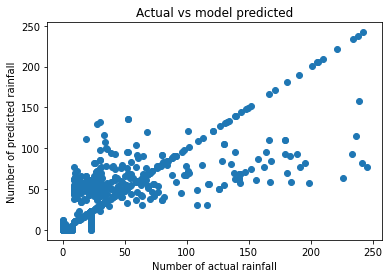

In [245]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Number of actual rainfall')
plt.ylabel('Number of predicted rainfall')
plt.title('Actual vs model predicted')
plt.show()

Finally, done.